In [5]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 287.2 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 359.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [9]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [10]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
# feature engineering
# create daily version of data set
# convert the datetime column into a datetime data type
bikes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
# with the pd.to_datetime() function we can make the change
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [16]:
# set the datetime as an index
bikes_daily = bikes.set_index('datetime')

In [18]:
bikes_daily = bikes_daily.resample('D').aggregate({'season':'max', 'holiday':'max','workingday':'max', 'weather':'max',\
                                                   'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean',\
                                                    'casual':'sum', 'registered':'sum', 'count':'sum'})

In [19]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,3.0,14.110833,18.181250,80.583333,10.749871,331,654,985
2011-01-02,1.0,0.0,0.0,3.0,14.902609,17.686957,69.608696,16.652122,131,670,801
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349
2011-01-04,1.0,0.0,1.0,2.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,2.0,13.290833,16.919167,65.041667,7.125450,767,4280,5047
2012-12-16,4.0,0.0,0.0,3.0,14.862500,18.496875,83.875000,6.749692,538,3248,3786
2012-12-17,4.0,0.0,1.0,3.0,16.126667,20.075000,90.708333,6.583308,212,4373,4585


In [20]:
# set the datetime as an index
bikes_daily = bikes.set_index('datetime')

In [21]:
# isolate the hour of the day to assess time of day
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

In [22]:
def time_of_day(x):
    if x >= 6 and x <= 9:
        return 'morning_commute'
    elif x > 9 and x <= 3:
        return 'midday'
    elif x > 3 and x <= 7:
        return 'evening_commute'
    else:
        return 'afterhours'

In [23]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

In [24]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,afterhours
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,afterhours
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,afterhours
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,afterhours
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,evening_commute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,afterhours
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,afterhours
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,afterhours
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,afterhours


In [25]:
# return the weekday > day 0 = Monday
bikes['weekday'] = bikes['datetime'].apply(lambda x: x.weekday())

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#Evaluate weekday vs number of casual or registered or total rentals 

<Axes: xlabel='weekday', ylabel='count'>

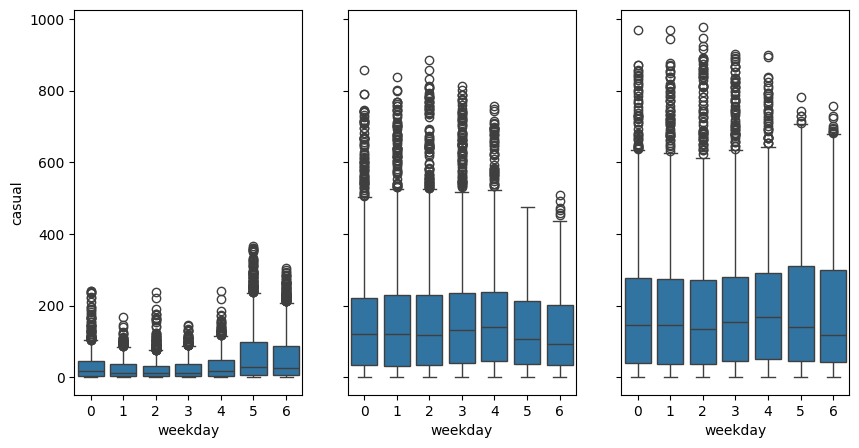

In [32]:
# evaluate weekday vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3)


/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/4153719926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/4153719926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/4153719926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='count', data=bikes,

<Axes: xlabel='weekday', ylabel='count'>

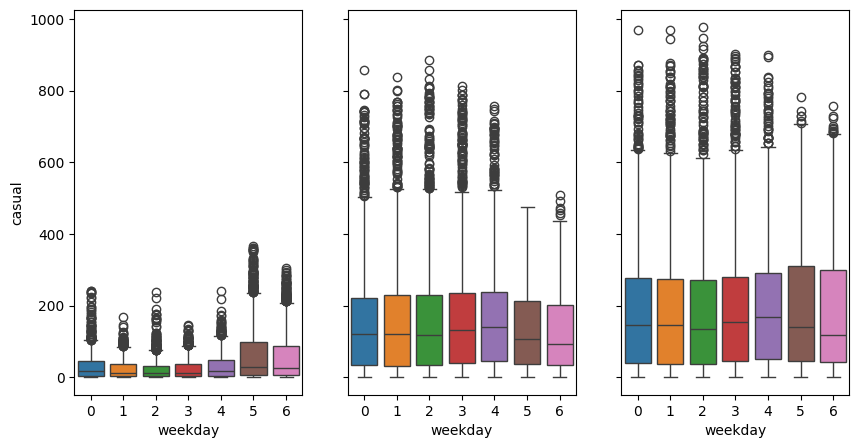

In [33]:
# evaluate weekday vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3, palette='tab10')

In [34]:
def time_of_day(x):
    if x >= 6 and x <= 9:
        return 'morning_commute'
    elif x > 9 and x <= 15:
        return 'midday'
    elif x > 15 and x <= 19:
        return 'evening_commute'
    else:
        return 'afterhours'


In [35]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

In [36]:
ax2.set_ylabel('registered')
ax3.set_ylabel('count')

Text(611.044934640523, 0.5, 'count')

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/2019248654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/2019248654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/2019248654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='count',

<Axes: xlabel='time_of_day', ylabel='count'>

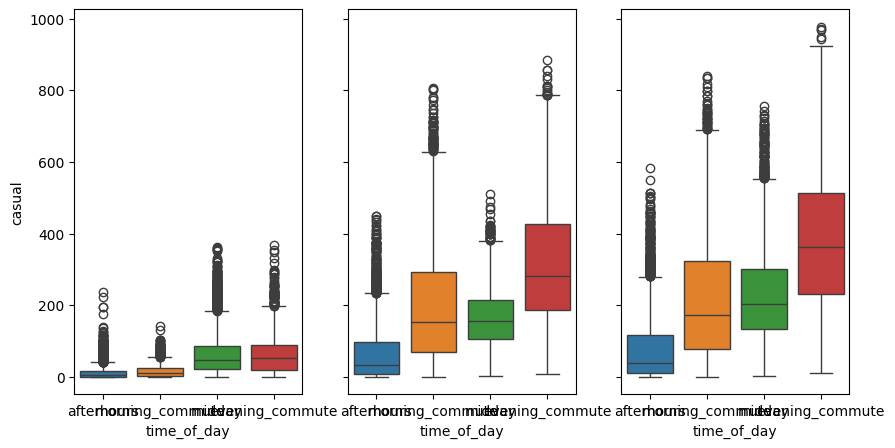

In [37]:
# evaluate time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='time_of_day', y='count', data=bikes, ax=ax3, palette='tab10')

In [38]:
ax2.set_ylabel('registered')
ax3.set_ylabel('count')

Text(611.044934640523, 0.5, 'count')

<Axes: xlabel='weekday', ylabel='count'>

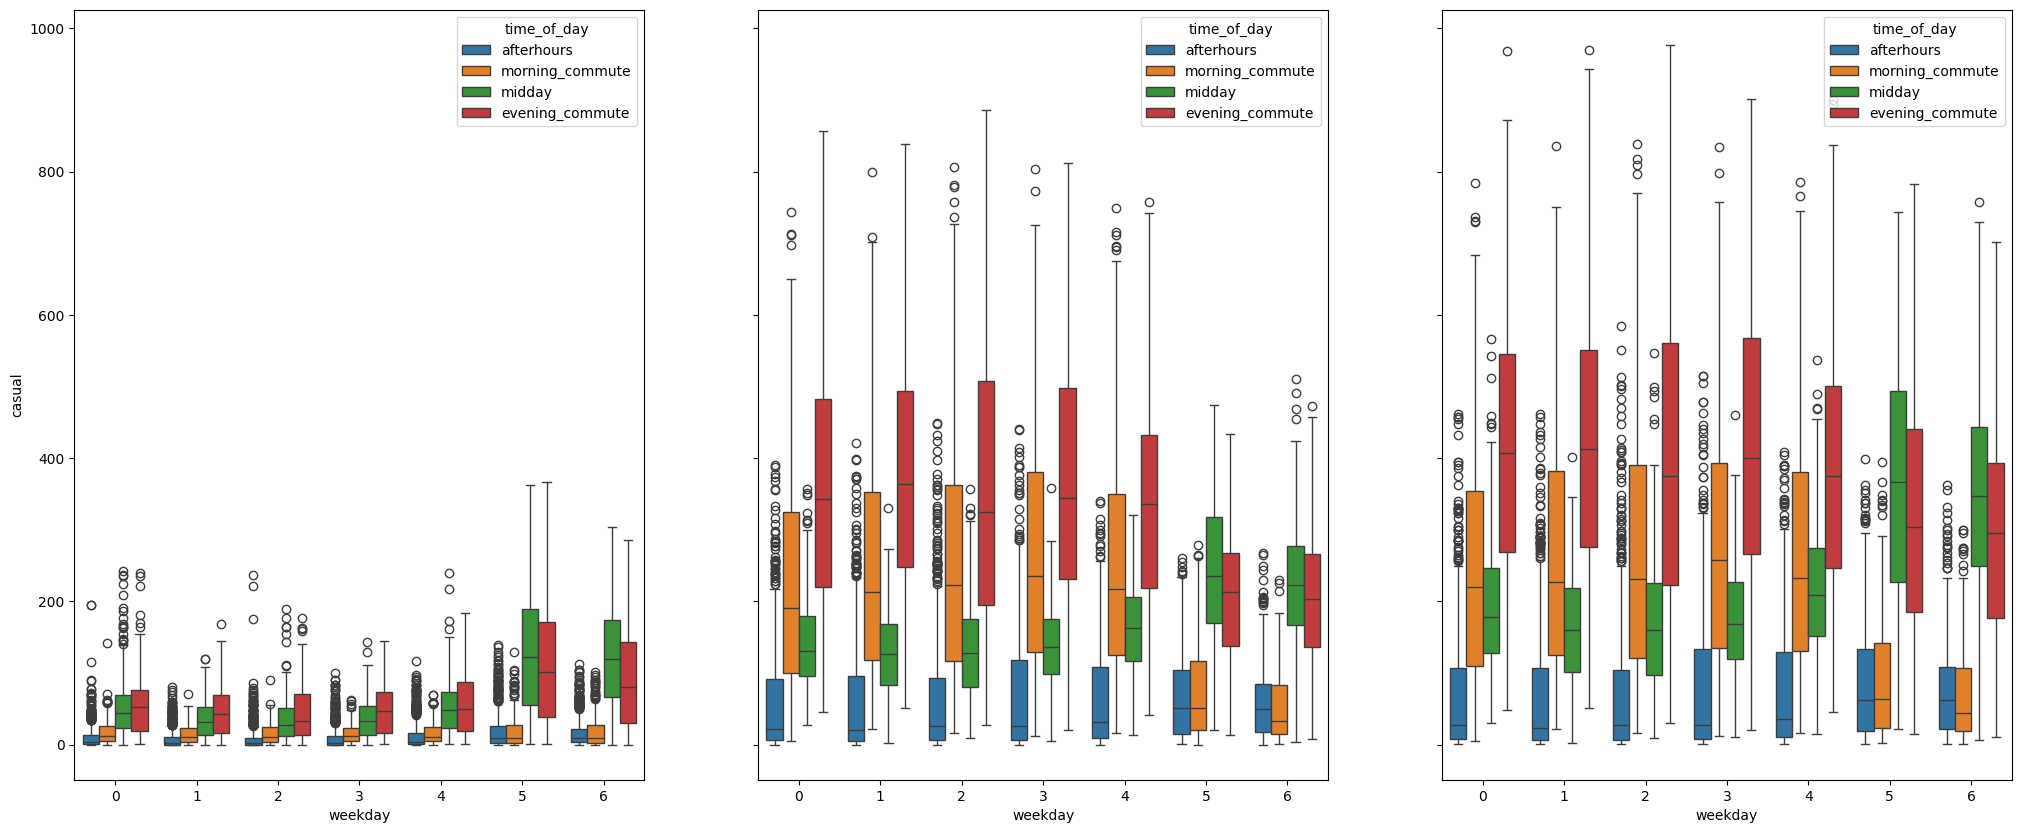

In [39]:
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.boxplot(x='weekday', y='casual', hue='time_of_day',data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='weekday', y='registered', hue='time_of_day',data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='weekday', y='count', hue='time_of_day',data=bikes, ax=ax3, palette='tab10')

In [40]:
#Let's look at temperature vs rental counts
#Evaluate weekday 

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/3082714772.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/3082714772.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_71769/3082714772.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3, palette='tab10')


<Axes: xlabel='temp', ylabel='count'>

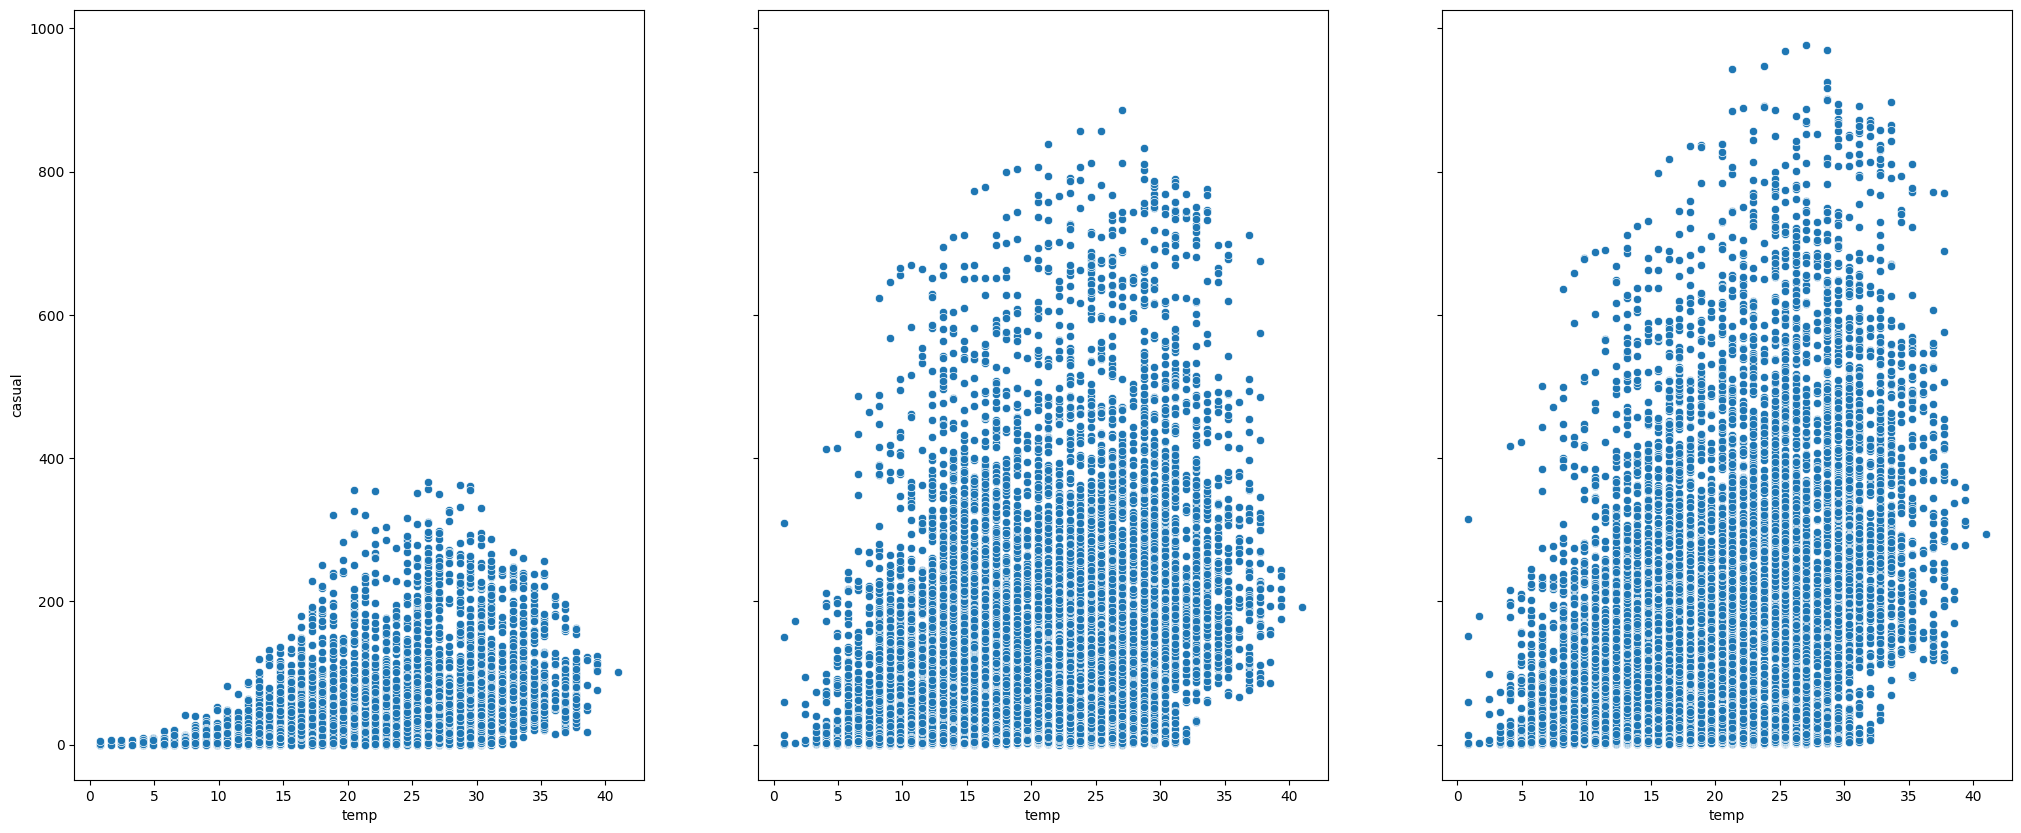

In [41]:
# lets look at Temperature vs. Rental Counts
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3, palette='tab10')

<Axes: xlabel='temp', ylabel='count'>

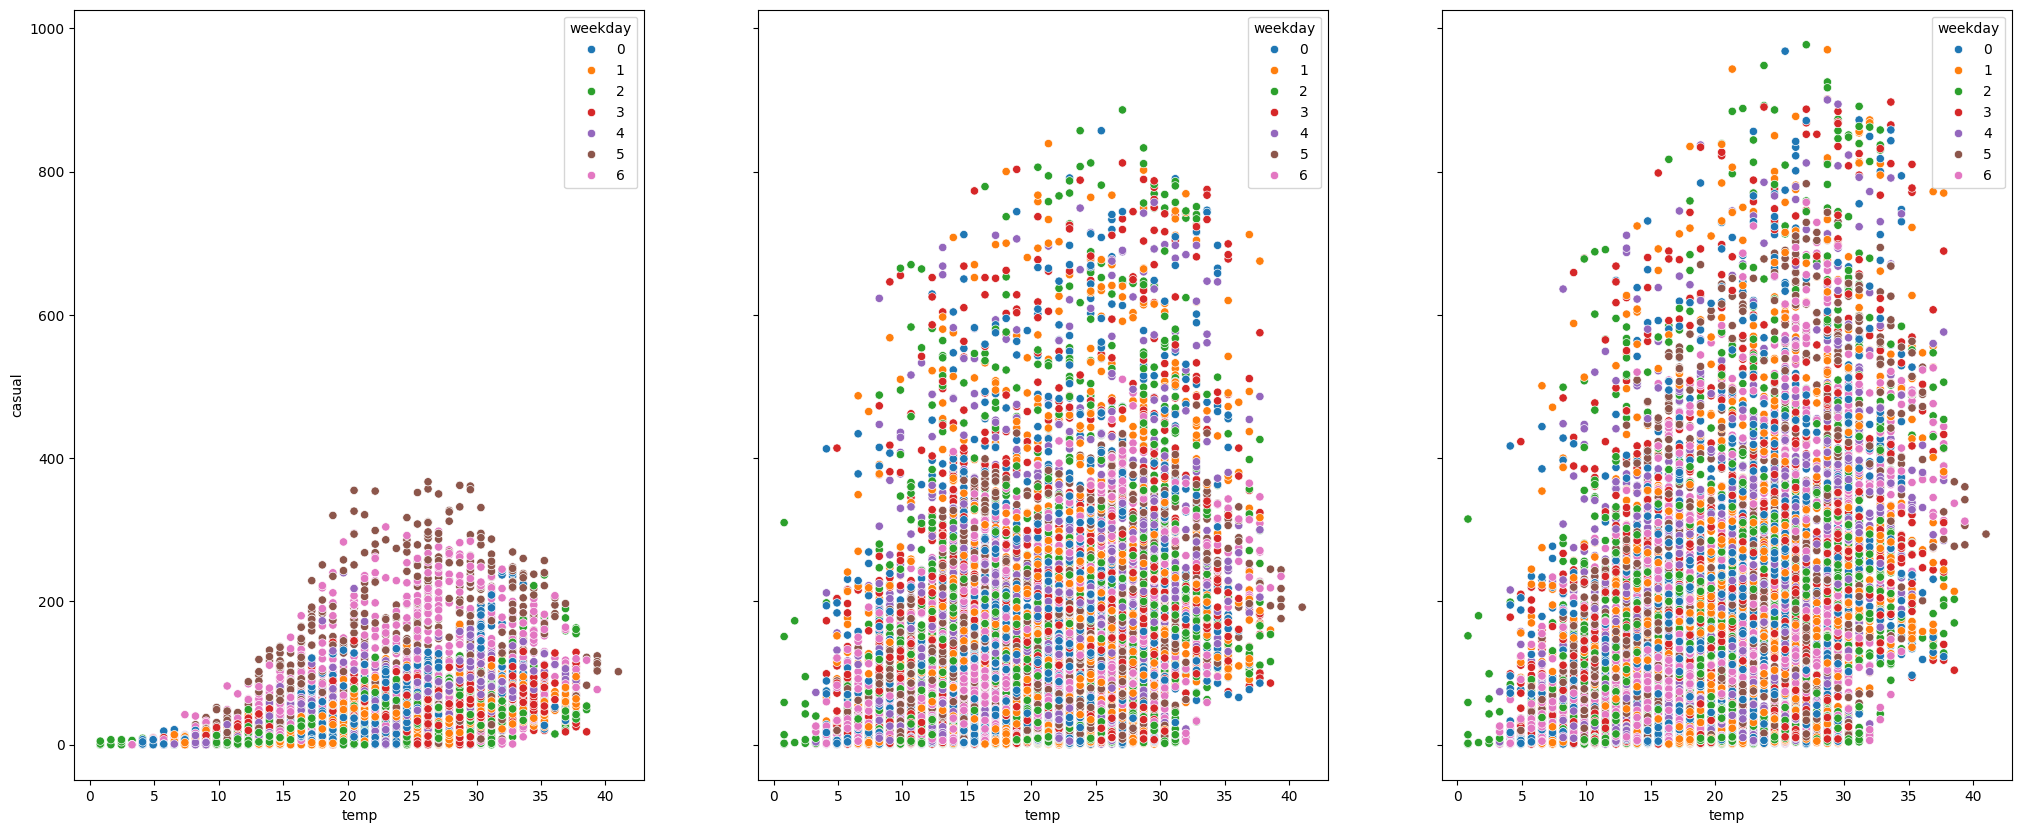

In [44]:
# lets look at Temperature vs. Rental Counts
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
sns.scatterplot(x='temp', y='casual', hue='weekday',data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', hue='weekday', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', hue='weekday', data=bikes, ax=ax3, palette='tab10')

<Axes: xlabel='temp', ylabel='count'>

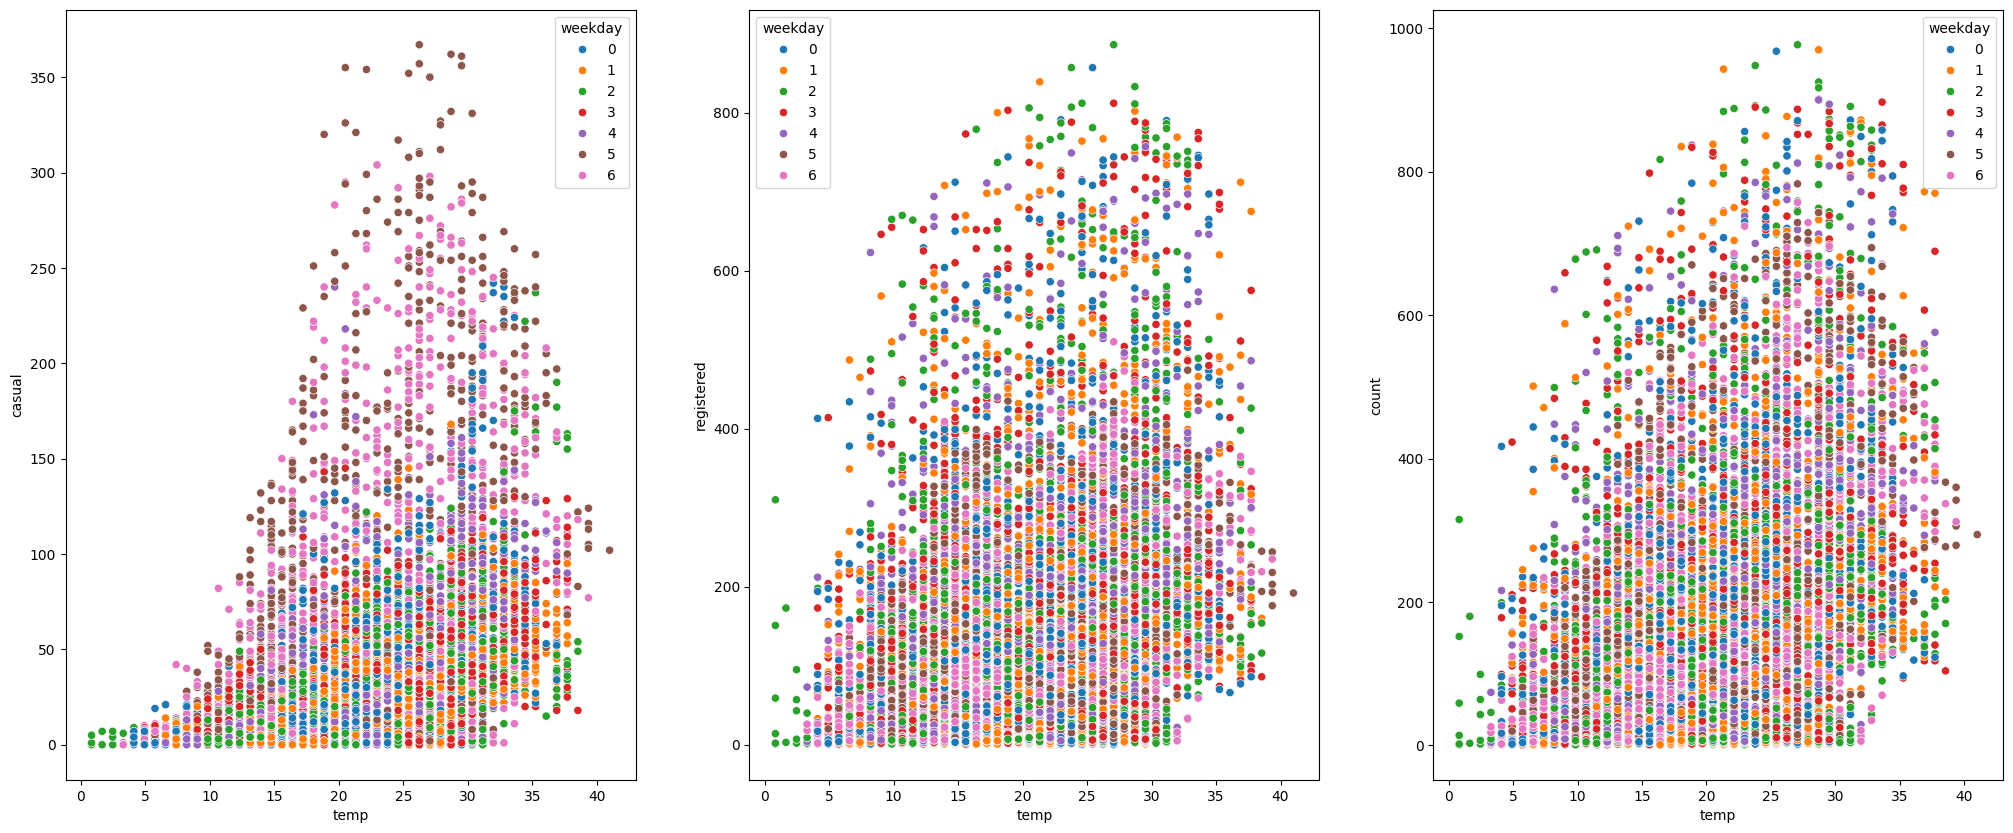

In [45]:
# lets look at Temperature vs. Rental Counts
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=False)
sns.scatterplot(x='temp', y='casual', hue='weekday',data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', hue='weekday', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', hue='weekday', data=bikes, ax=ax3, palette='tab10')

In [46]:
bikes[bikes['time_of_day']=='evening_commute']['casual'].describe()

count    1824.000000
mean       65.248904
std        57.820172
min         0.000000
25%        19.000000
50%        54.000000
75%        90.250000
max       367.000000
Name: casual, dtype: float64

In [47]:
model_data = pd.get_dummies(data = bikes[['temp','weekday','time_of_day']], columns=['weekday','time_of_day']).head()

In [50]:
model_data = pd.get_dummies(data = bikes[['casual','temp','weekday','time_of_day']], columns=['weekday','time_of_day']).head()

 


In [51]:
model_data = pd.get_dummies(data = bikes[['casual','temp','weekday','time_of_day']], columns=['weekday','time_of_day'], dtype=int)

In [49]:
model = ols("casual ~ temp +  weekday_1 + weekday_2 + weekday_3 + \
       weekday_4 + weekday_5 + weekday_6  + \
            time_of_day_evening_commute + time_of_day_midday + time_of_day_morning_commute", data=model_data).fit()

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1134.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:07:25   Log-Likelihood:                -54136.
No. Observations:               10886   AIC:                         1.083e+05
Df Residuals:                   10875   BIC:                         1.084e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [53]:
predictions = model.predict(model_data.iloc[:,1:])

In [55]:
final_data = pd.concat([model_data, predictions], axis=1)
final_data.rename(columns={0:'predictions'}, inplace=True)
final_data['residuals'] = final_data['predictions'] - final_data['casual']

<Axes: xlabel='predictions', ylabel='residuals'>

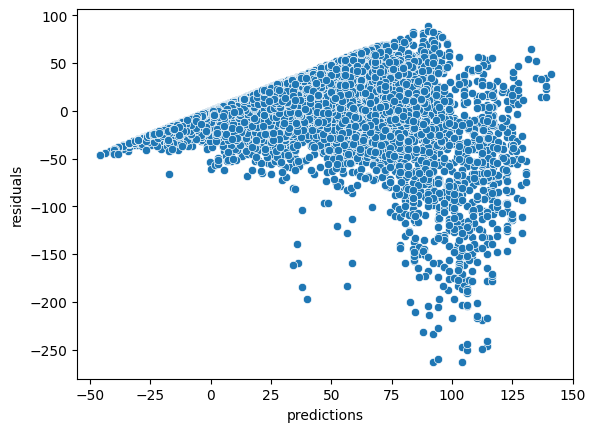

In [56]:
sns.scatterplot(x='predictions', y='residuals', data=final_data)

<Axes: xlabel='residuals', ylabel='Count'>

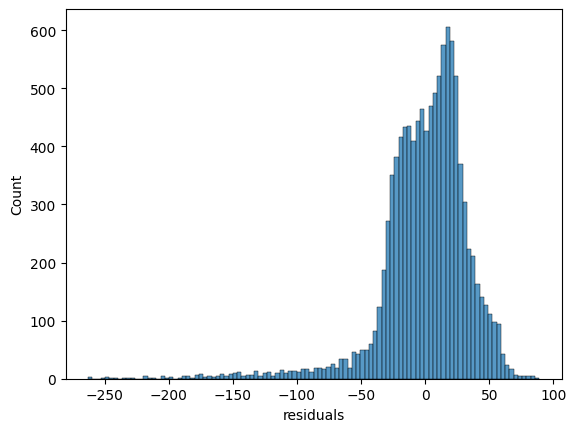

In [57]:
# check for normal distribution of residuals
sns.histplot(final_data['residuals'])

CONCLUSION - Model is not fit not the data.

Liner Regression model - highly biased. Try Feature engineering. 


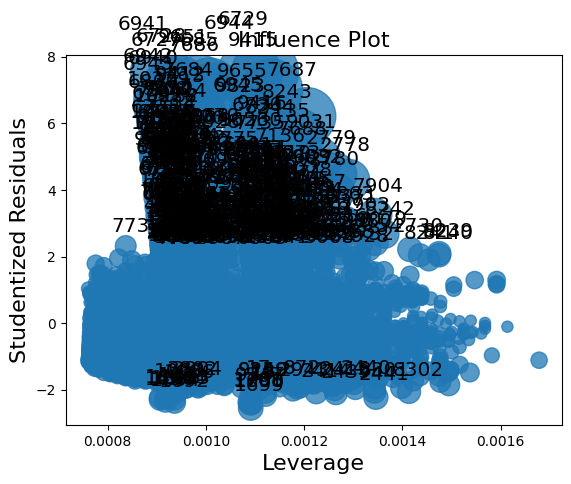

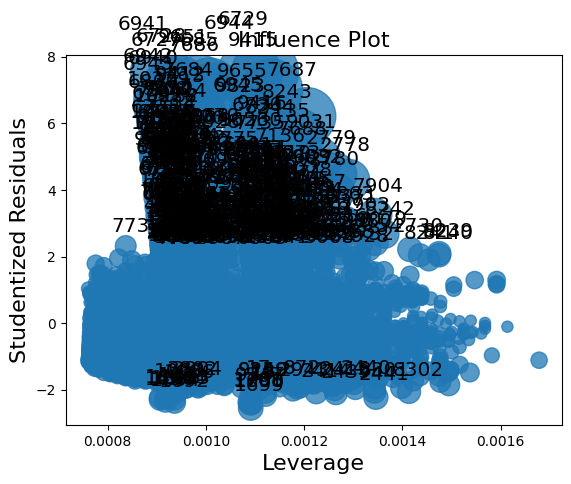

In [58]:
import statsmodels.api as sm
sm.graphics.influence_plot(model, criterion = 'cooks')